## Import packages

In [381]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

Read the file **header.pkl** with pandas as DataFrame and the file **seismic_data_source_1000.nc** with xarray as DataSet

In [382]:
header = pd.read_pickle("header_new.pkl")
seismic_data= xr.open_dataset("seismic_data_source_2500.nc")
seismic_data

<xarray.Dataset>
Dimensions:  (twt: 4001, time: 4001, cdp: 1244)
Coordinates:
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp      (cdp) int32 2491780 2491781 2491782 ... 2493021 2493022 2493023
Data variables:
    data     (cdp, time) float32 ...
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-5.77301287e+03 -4.69675457e+03 -3.01528368e+02  7....

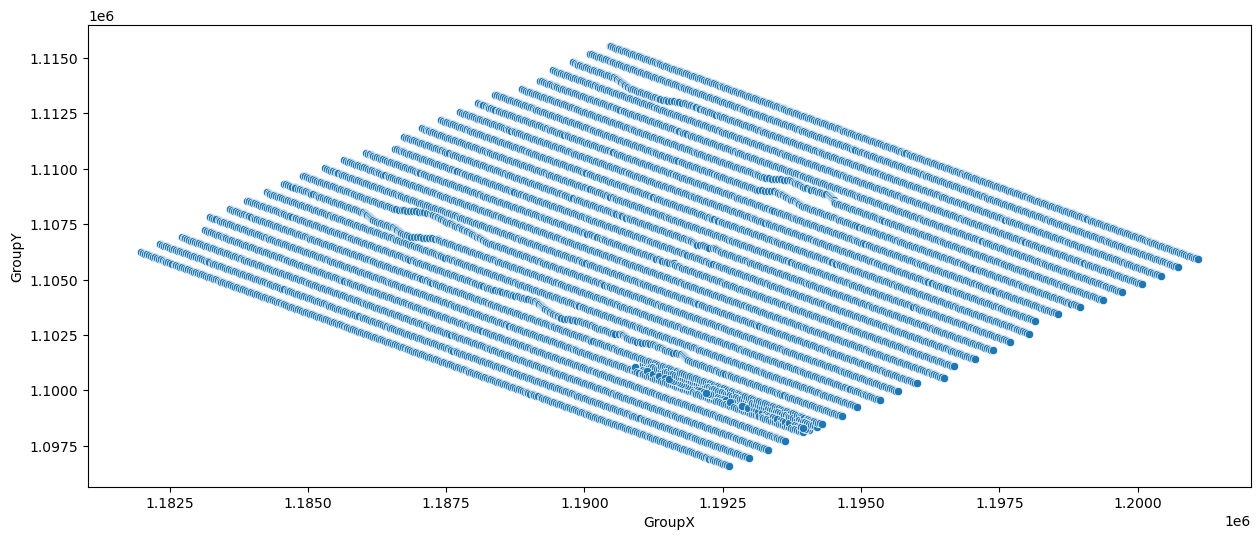

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981934,8666679,2981935,3628,1916,2933,210725,0,12,0,1,...,0,0,0,0,0,0,147364.797755,1.626009e+06,144561.355938,1.625250e+06
2981935,8666680,2981936,3628,1917,2933,210726,0,12,0,1,...,0,0,0,0,0,0,147412.961969,1.626009e+06,144561.355938,1.625250e+06
2981936,8666681,2981937,3628,1918,2933,210727,0,12,0,1,...,0,0,0,0,0,0,147460.385105,1.626009e+06,144561.355938,1.625250e+06
2983819,8670862,2983820,3530,2084,2935,206392,0,12,0,1,...,0,0,0,0,0,0,147509.220738,1.626009e+06,144792.985494,1.624750e+06


In [383]:
rec_pos=header.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos, x="GroupX", y="GroupY")
plt.show()
rec_pos

## Create new dimensions
Compute **Azimuth** and **Offset** from sources and receivers positions.

In [384]:
pos_x=np.array(header['SourceX']-header['GroupX'], dtype='f')
pos_y=np.array(header['SourceY']-header['GroupY'], dtype='f')
azimuth=np.arctan2(-pos_x, pos_y) * 180 / np.pi+180
#offset = np.linalg.norm([pos_x,pos_y], axis=0)*np.sign(-pos_x)  
offset = -pos_x
header['Azimuth']=azimuth
header['Offset']=offset
source=2500
header=header[header['EnergySourcePoint']==source] # Analizar disparo source
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset
2491780,7415278,2491781,1624,374,2500,58689,0,12,0,1,...,0,0,0,0,142183.770967,1.615426e+06,143261.151632,1.618223e+06,116.753159,-2676.0
2491781,7415279,2491782,1624,375,2500,58691,0,12,0,1,...,0,0,0,0,142231.935181,1.615427e+06,143261.151632,1.618223e+06,117.614334,-2640.0
2491782,7415280,2491783,1624,376,2500,58692,0,12,0,1,...,0,0,0,0,142280.099395,1.615427e+06,143261.151632,1.618223e+06,118.485443,-2604.0
2491783,7415281,2491784,1624,377,2500,58692,0,12,0,1,...,0,0,0,0,142328.193950,1.615426e+06,143261.151632,1.618223e+06,119.373642,-2569.0
2491784,7415282,2491785,1624,378,2500,58693,0,12,0,1,...,0,0,0,0,142374.945668,1.615427e+06,143261.151632,1.618223e+06,120.236755,-2534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493019,7418173,2493020,1624,3269,2500,106472,0,12,0,1,...,0,0,0,0,144231.290818,1.620969e+06,143261.151632,1.618223e+06,298.368683,2563.0
2493020,7418174,2493021,1624,3270,2500,106473,0,12,0,1,...,0,0,0,0,144279.455032,1.620970e+06,143261.151632,1.618223e+06,297.483459,2599.0
2493021,7418175,2493022,1624,3271,2500,106474,0,12,0,1,...,0,0,0,0,144326.878168,1.620969e+06,143261.151632,1.618223e+06,296.617218,2634.0
2493022,7418176,2493023,1624,3272,2500,106475,0,12,0,1,...,0,0,0,0,144375.042383,1.620970e+06,143261.151632,1.618223e+06,295.752502,2670.0


Compute **Geodesic**

In [385]:
import pickle
with open('inter_topo.pkl', 'rb') as f:
     rbf = pickle.load(f)
x_pts=header[['SourceX_new','ReceiverX']].to_numpy().astype('f')
y_pts=header[['SourceY_new','ReceiverY']].to_numpy().astype('f')
xt = np.transpose(np.linspace(x_pts[:,0],x_pts[:,1],20))
yt = np.transpose(np.linspace(y_pts[:,0],y_pts[:,1],20))
np.shape(xt)

(1244, 20)

In [386]:
zt = rbf(xt,yt)
#zt = np.zeros(np.shape(xt))
#for i in range(np.size(xt,axis=0)):
#    zt[i,:] = rbf(xt[i,:], yt[i,:])
np.shape(zt)
geodesic = np.sum(np.linalg.norm([np.diff(xt),np.diff(yt),np.diff(zt)], axis=0), axis=1)
header['Geodesic']=geodesic
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset,Geodesic
2491780,7415278,2491781,1624,374,2500,58689,0,12,0,1,...,0,0,0,142183.770967,1.615426e+06,143261.151632,1.618223e+06,116.753159,-2676.0,3058.407271
2491781,7415279,2491782,1624,375,2500,58691,0,12,0,1,...,0,0,0,142231.935181,1.615427e+06,143261.151632,1.618223e+06,117.614334,-2640.0,3041.552265
2491782,7415280,2491783,1624,376,2500,58692,0,12,0,1,...,0,0,0,142280.099395,1.615427e+06,143261.151632,1.618223e+06,118.485443,-2604.0,3027.302350
2491783,7415281,2491784,1624,377,2500,58692,0,12,0,1,...,0,0,0,142328.193950,1.615426e+06,143261.151632,1.618223e+06,119.373642,-2569.0,3014.160032
2491784,7415282,2491785,1624,378,2500,58693,0,12,0,1,...,0,0,0,142374.945668,1.615427e+06,143261.151632,1.618223e+06,120.236755,-2534.0,3003.880661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493019,7418173,2493020,1624,3269,2500,106472,0,12,0,1,...,0,0,0,144231.290818,1.620969e+06,143261.151632,1.618223e+06,298.368683,2563.0,2985.730178
2493020,7418174,2493021,1624,3270,2500,106473,0,12,0,1,...,0,0,0,144279.455032,1.620970e+06,143261.151632,1.618223e+06,297.483459,2599.0,2994.018608
2493021,7418175,2493022,1624,3271,2500,106474,0,12,0,1,...,0,0,0,144326.878168,1.620969e+06,143261.151632,1.618223e+06,296.617218,2634.0,3003.771541
2493022,7418176,2493023,1624,3272,2500,106475,0,12,0,1,...,0,0,0,144375.042383,1.620970e+06,143261.151632,1.618223e+06,295.752502,2670.0,3017.695050


## Highligth position by inline
Show receivers from the source 1000 with inline 257.

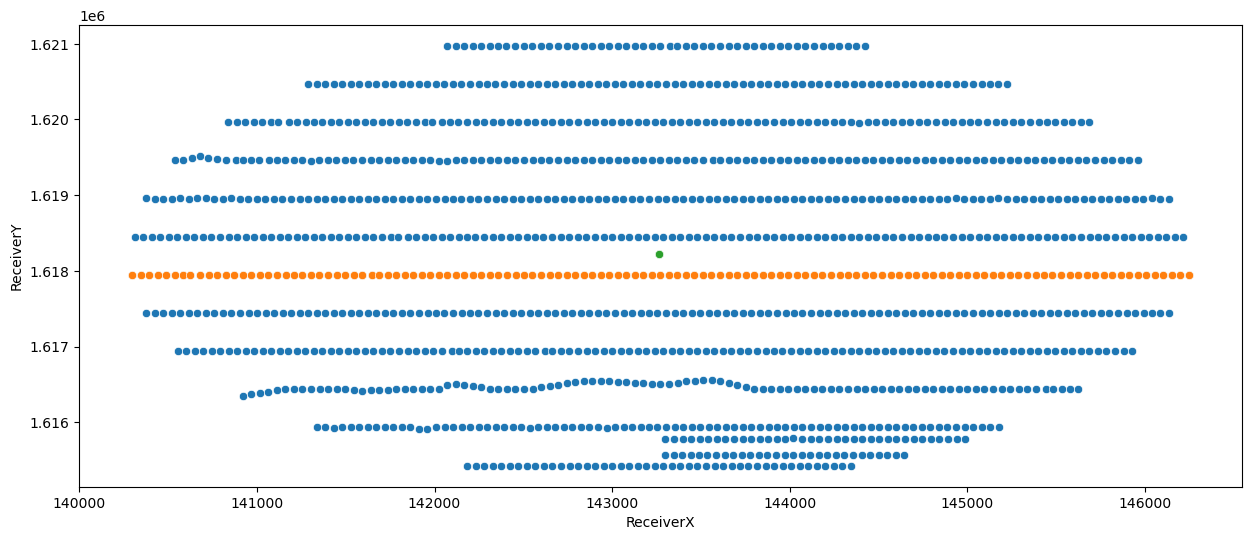

In [387]:
source=2500
inline = 130
shot_pos=header[header['EnergySourcePoint']==source]
rec_inline_pos=shot_pos[(shot_pos['INLINE_3D']==inline)]
sns.scatterplot(data=header, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=rec_inline_pos, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=rec_inline_pos, x="SourceX_new", y="SourceY_new")
plt.show()

In [388]:
#shot_pos[['INLINE_3D']].drop_duplicates()

## Selecting traces for the azimuth bin
Create the azimuth coordinate for the DataSet **seismic_data**

In [389]:
seismic_data["inline"] = ("inline",  shot_pos['INLINE_3D'])
seismic_data["azimuth"] = ("inline",  shot_pos['Azimuth'])
seismic_data["offset"] = ("inline",  shot_pos['Offset'])
seismic_data["geodesic"] = ("inline",  shot_pos['Geodesic'])
seismic_data["data"] = (("inline", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:   (twt: 4001, time: 4001, inline: 1244, cdp: 1244)
Coordinates:
  * twt       (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp       (cdp) int32 2491780 2491781 2491782 ... 2493021 2493022 2493023
  * inline    (inline) int16 95 95 95 95 95 95 95 ... 172 172 172 172 172 172
Data variables:
    data      (inline, time) float32 -8.253 -7.253 -40.26 ... -35.04 -63.04
    azimuth   (inline) float32 116.8 117.6 118.5 119.4 ... 296.6 295.8 294.9
    offset    (inline) float32 -2.676e+03 -2.64e+03 ... 2.67e+03 2.706e+03
    geodesic  (inline) float64 3.058e+03 3.042e+03 ... 3.018e+03 3.032e+03
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-5.77301287e+03 -4.69675457e+03 -3.01528368e+02  7....

Select DataArray **data_azimuth** from the DataSet **seimisc_data** in the azimuth bin.

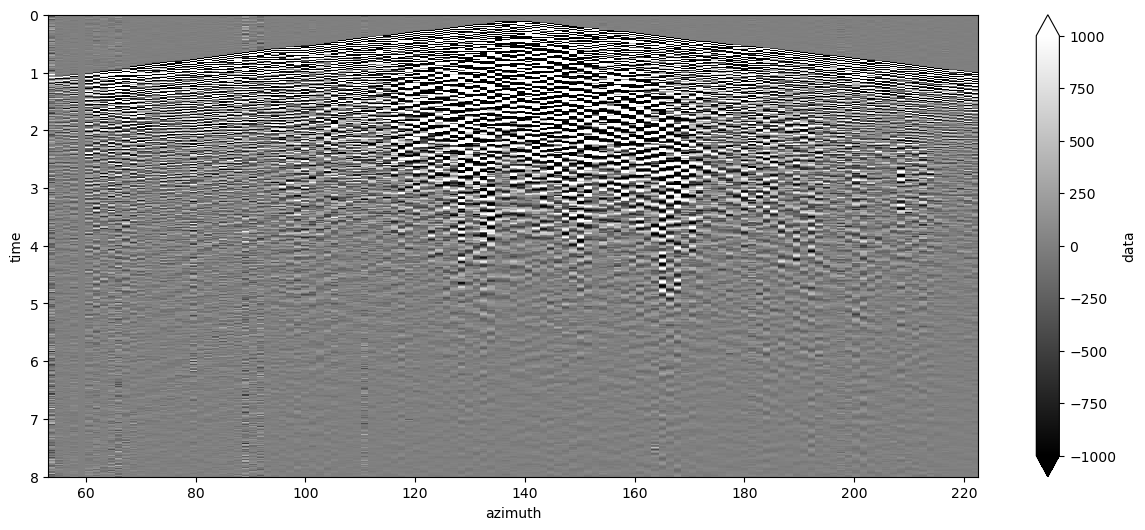

In [390]:
data = seismic_data.where((seismic_data.inline==inline), drop=True)  #Select traces for the azimuth bin
data=data.swap_dims({"inline": "azimuth"})
data_azimuth = data.data.sortby('azimuth') #Sort DataArray by azimuth
data_azimuth.plot.imshow('azimuth','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

Plot the shot gather foe the azimuth bin sort by azimuth.

## Sort the data by offset and geodesic
Select DataArray **data_offset** from the DataSet **data** in the azimuth bin.
Select DataArray **data_geodesic** from the DataSet **data** in the azimuth bin.

In [391]:
data=data.swap_dims({"azimuth": "offset"})
data

<xarray.Dataset>
Dimensions:   (offset: 125, time: 4001, twt: 4001, cdp: 1244)
Coordinates:
    azimuth   (offset) float32 53.16 53.24 53.34 53.36 ... 222.4 222.5 222.5
  * offset    (offset) float32 -2.383e+03 -2.347e+03 ... 1.992e+03 2.027e+03
  * twt       (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp       (cdp) int32 2491780 2491781 2491782 ... 2493021 2493022 2493023
    inline    (offset) int16 130 130 130 130 130 130 ... 130 130 130 130 130 130
Data variables:
    data      (offset, time) float32 117.4 4.367 -48.62 ... -6.586 -4.586 -5.586
    geodesic  (offset) float64 3.096e+03 3.047e+03 ... 2.996e+03 3.043e+03
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-5.77301287e+03 -4.69675457e+03 -3.01528368e+02  7....

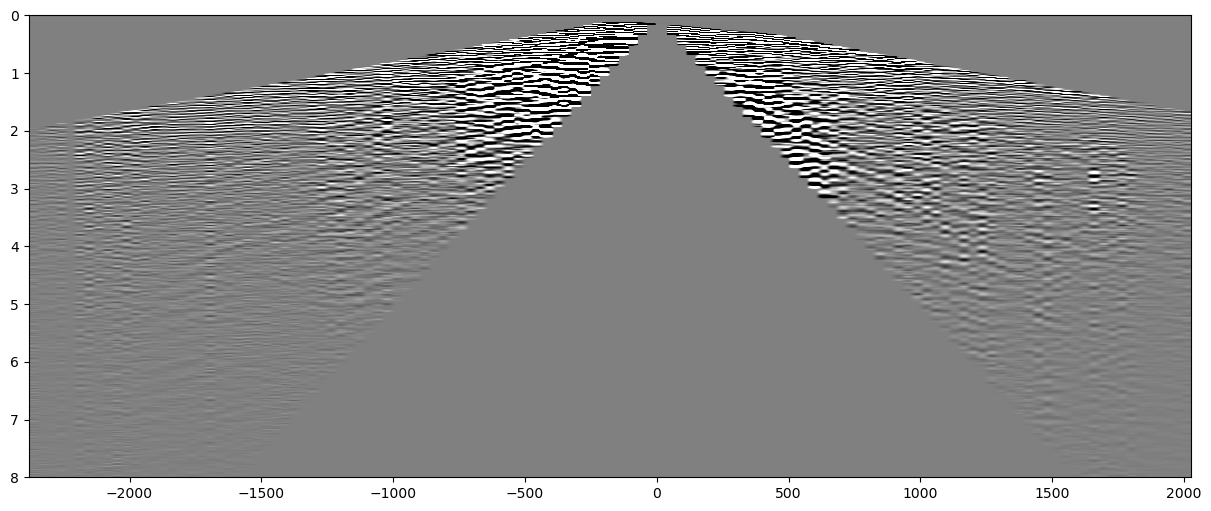

In [392]:
#data=data.swap_dims({"azimuth": "offset"})
xx, tt = np.meshgrid(data.offset, data.time)
M = np.abs(xx)/(tt+2e-2)
M = (M>200)*(M<1200)
xmin, xmax= data.offset[0], data.offset[-1]
tmin, tmax = data.time[0], data.time[-1]
plt.imshow(M,cmap='gray',origin='upper',extent=(xmin, xmax, tmax, tmin),aspect='auto')
data['data'] = data.data*M.T
plt.imshow(data.data.T,cmap='gray',origin='upper',extent=(xmin, xmax, tmax, tmin),aspect='auto',vmin=-1000,vmax=1000)
data_offset = data.data.sortby('offset') #Sort DataArray by offset


In [393]:
data=data.swap_dims({"offset": "geodesic"})
data_geodesic = data.data.sortby('geodesic') #Sort DataArray by offset

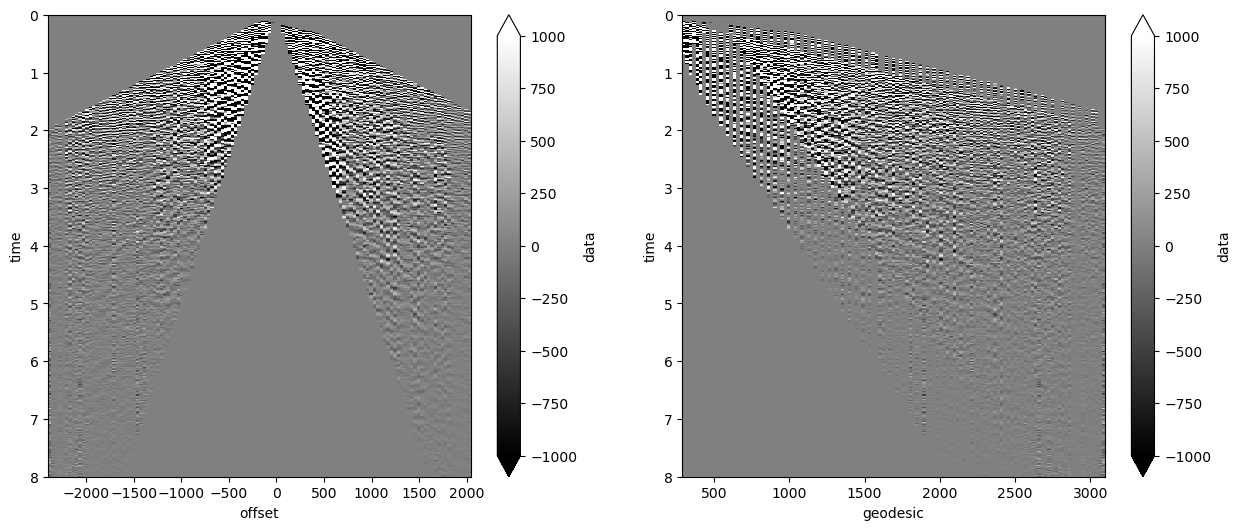

In [394]:
plt.rcParams['figure.figsize'] = [15, 6]
fig, axs = plt.subplots(1,2)
data_offset.plot.imshow('offset','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper', ax=axs[0])
data_geodesic.plot.imshow('geodesic','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper', ax=axs[1])

In [395]:
data_offset

<xarray.DataArray 'data' (offset: 125, time: 4001)>
array([[   0.       ,    0.       ,   -0.       , ..., -125.63397  ,
         148.37003  ,  328.3711   ],
       [   0.       ,    0.       ,    0.       , ...,   81.64395  ,
          32.645752 ,  -72.35547  ],
       [   0.       ,    0.       ,    0.       , ...,  -13.980934 ,
         -14.980926 ,   -7.9804688],
       ...,
       [   0.       ,    0.       ,    0.       , ...,  -13.312122 ,
         -12.312477 ,  -21.3125   ],
       [  -0.       ,   -0.       ,   -0.       , ...,    1.8905945,
           2.8906593,   -2.109375 ],
       [   0.       ,    0.       ,    0.       , ...,   -6.585535 ,
          -4.586336 ,   -5.5859375]], dtype=float32)
Coordinates:
    azimuth  (offset) float32 53.16 53.24 53.34 53.36 ... 222.4 222.5 222.5
  * offset   (offset) float32 -2.383e+03 -2.347e+03 ... 1.992e+03 2.027e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    inline   (offset) int16 130 130 130 130 130 130 ... 130 130 130 130 130 130

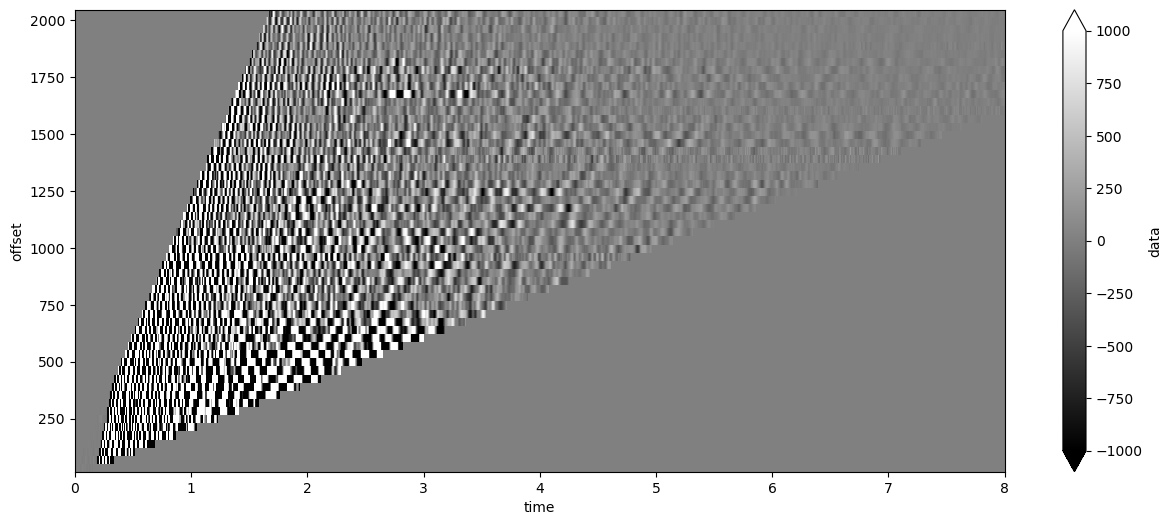

In [396]:
data_offsetp=data_offset.where((data_offset.offset>0), drop=True)
data_offsetn=data_offset.where((data_offset.offset<0), drop=True)
data_offsetn['offset']=np.abs(data_offsetn['offset'])
data_offsetp.plot.imshow(data_offsetp.dims[1],data_offsetp.dims[0],cmap='gray', vmin=-1000, vmax=1000)
#data_offsetn.plot.imshow(data_offsetn.dims[1],data_offsetn.dims[0],cmap='gray', vmin=-1000, vmax=1000)

In [397]:
data_geodesic

<xarray.DataArray 'data' (geodesic: 125, time: 4001)>
array([[  -0.       ,   -0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [  -0.       ,    0.       ,   -0.       , ...,    0.       ,
          -0.       ,   -0.       ],
       [   0.       ,   -0.       ,   -0.       , ...,    0.       ,
           0.       ,    0.       ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,   -6.585535 ,
          -4.586336 ,   -5.5859375],
       [   0.       ,    0.       ,    0.       , ...,   81.64395  ,
          32.645752 ,  -72.35547  ],
       [   0.       ,    0.       ,   -0.       , ..., -125.63397  ,
         148.37003  ,  328.3711   ]], dtype=float32)
Coordinates:
    azimuth   (geodesic) float32 149.8 140.0 130.2 158.8 ... 222.5 53.24 53.16
    offset    (geodesic) float32 -142.0 -178.0 -213.0 ... -2.347e+03 -2.383e+03
  * geodesic  (geodesic) float64 289.7 290.4 299.1 ... 3.047e+03 3.096e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    inline    (geodesic) int16 130 130 130 130 130 130 ... 130 130 130 130 130

Plot the shot gather for the azimuth bin sort by offset.

Text(0, 0.5, 'Phase velocity (m/s)')

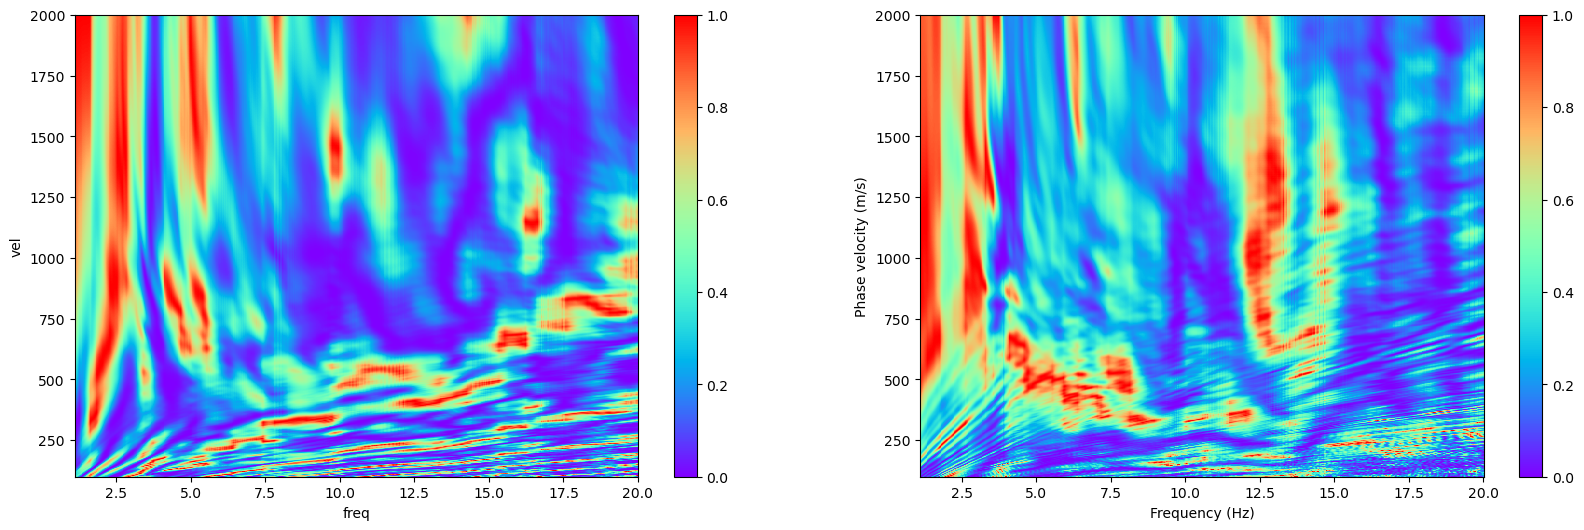

In [400]:
import masw_functions as mf
vmin=100.0 
vmax=2001.0
fmin=1.1 
fmax=20.0
pstep=5e-6
Nf=16001
v=np.arange(vmin,vmax)
D_offset=mf.DispersionSpectrum(data_offsetn,v,fmin,fmax,Nf,pstep)
D_geodesic=mf.DispersionSpectrum(data_geodesic,v,fmin,fmax,Nf,pstep)
#D_geodesic=D_offset-D_geodesic
plt.rcParams['figure.figsize'] = [20, 6]
fig, axs = plt.subplots(1,2)
D_offset.plot.imshow(D_offset.dims[1],D_offset.dims[0],cmap='rainbow', origin='lower', ax=axs[0])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")
D_geodesic.plot.imshow(D_geodesic.dims[1],D_geodesic.dims[0],cmap='rainbow', origin='lower', ax=axs[1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")

## Check alliased region

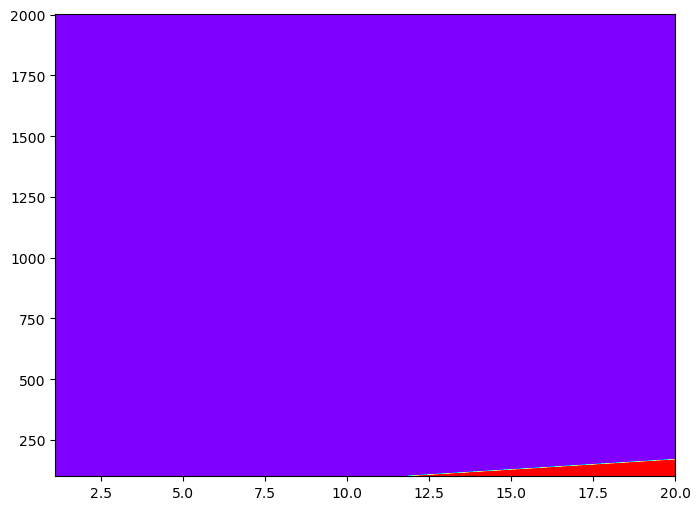

In [399]:
ff, vv = np.meshgrid(D_offset.freq, D_offset.vel.vel)
plt.rcParams['figure.figsize'] = [8, 6]
time = seismic_data['time'].values
geodesic = data_geodesic['geodesic'].values
dxmin = np.min(np.diff(geodesic))
dxmax = np.max(np.diff(geodesic))
#dx = 0.5*(dxmin + dxmax)
dx = len(np.abs(np.diff(geodesic))) / np.sum(1.0 / np.abs(np.diff(geodesic)))
kn = 1/(2*dx)
M = (ff/vv-2*kn > 0)
plt.imshow(M,cmap='rainbow', origin='lower',extent=(fmin, fmax, vmin, vmax),aspect='auto')